In [9]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)



 ## Z-Score Method
The Z-score method identifies outliers by measuring how many standard deviations a data point is from the mean.

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (Z-Score): (149, 4)


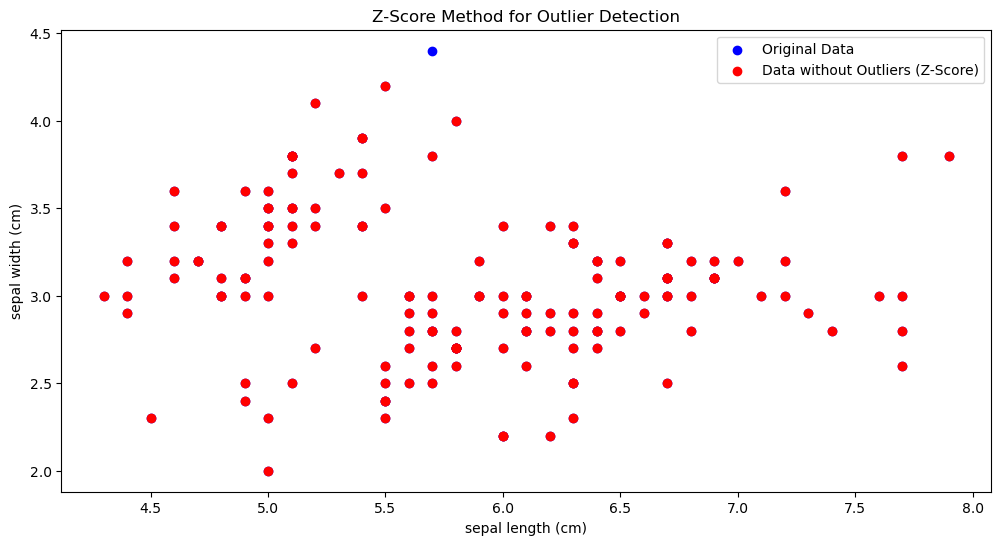

In [10]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(data))
threshold = 3
outliers = np.where(z_scores > threshold)

# Remove outliers
data_zs = data[(z_scores < threshold).all(axis=1)]

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (Z-Score):", data_zs.shape)
# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_zs.iloc[:, 0], data_zs.iloc[:, 1], color='red', label='Data without Outliers (Z-Score)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Z-Score Method for Outlier Detection')
plt.legend()
plt.show()


 # Interquartile Range (IQR) Method
The IQR method identifies outliers by looking at the spread of the middle 50% of the data.

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (IQR): (146, 4)


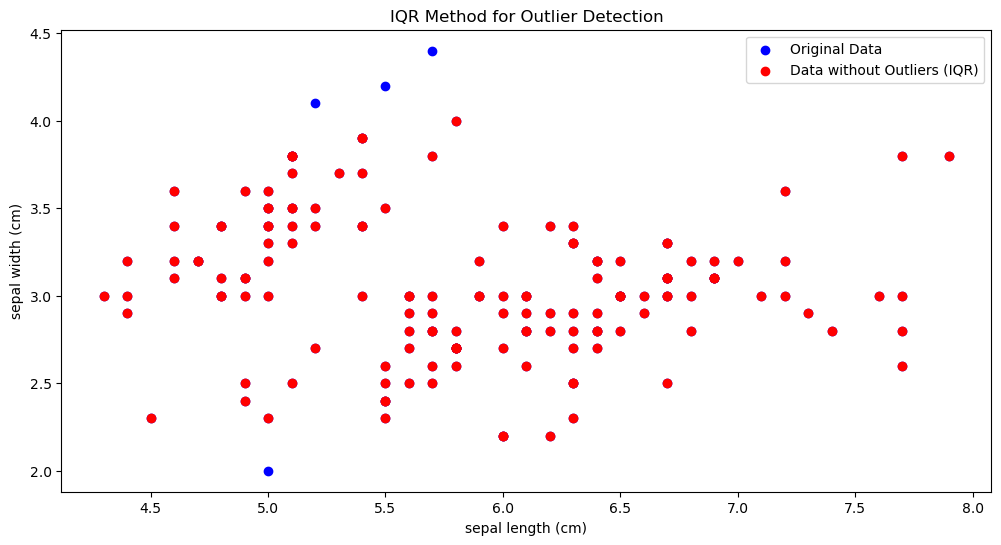

In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
data_iqr = data[~outliers]

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (IQR):", data_iqr.shape)


# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_iqr.iloc[:, 0], data_iqr.iloc[:, 1], color='red', label='Data without Outliers (IQR)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('IQR Method for Outlier Detection')
plt.legend()
plt.show()

# Isolation Forest
Isolation Forest is an algorithm specifically designed to detect outliers.

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (Isolation Forest): (135, 4)


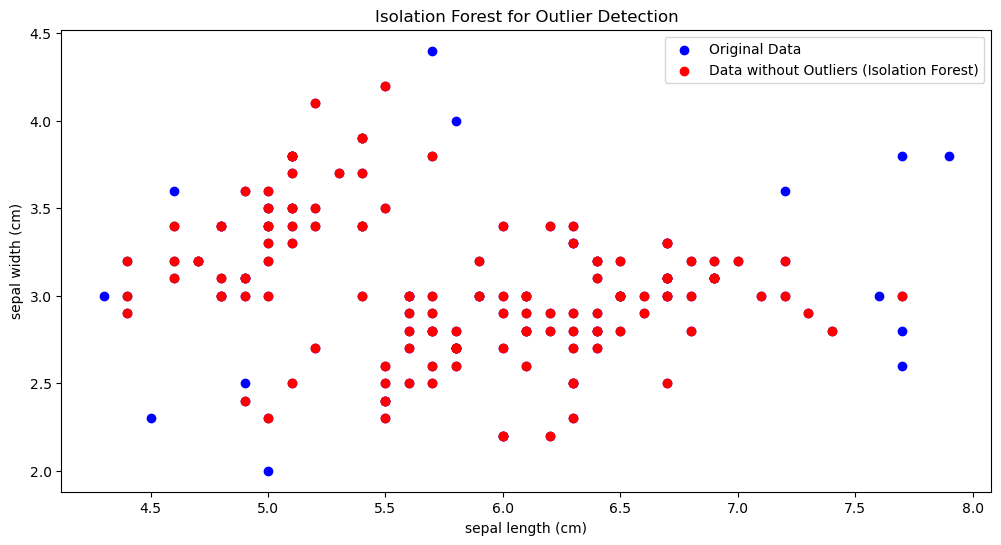

In [12]:
from sklearn.ensemble import IsolationForest

# Initialize the model
iso_forest = IsolationForest(contamination=0.1)

# Fit the model
outliers = iso_forest.fit_predict(data)

# Remove outliers
data_if = data[outliers == 1]

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (Isolation Forest):", data_if.shape)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_if.iloc[:, 0], data_if.iloc[:, 1], color='red', label='Data without Outliers (Isolation Forest)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Isolation Forest for Outlier Detection')
plt.legend()
plt.show()


# DBSCAN
DBSCAN is a clustering method that can also be used to identify outliers.

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (DBSCAN): (133, 4)


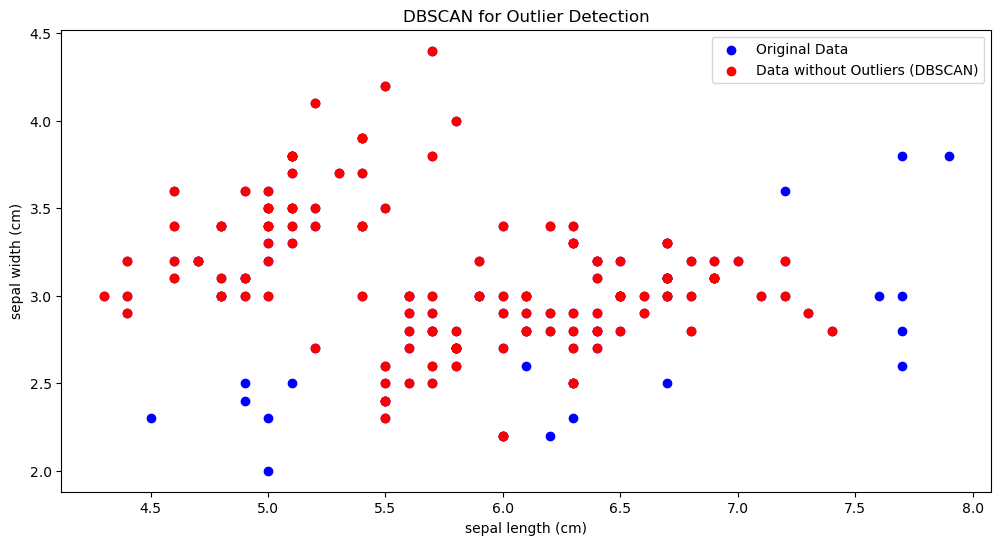

In [13]:
from sklearn.cluster import DBSCAN

# Initialize the model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
clusters = dbscan.fit_predict(data)

# Identify outliers (points labeled as -1 are outliers)
outliers = clusters == -1

# Remove outliers
data_dbscan = data[~outliers]

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (DBSCAN):", data_dbscan.shape)


# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_dbscan.iloc[:, 0], data_dbscan.iloc[:, 1], color='red', label='Data without Outliers (DBSCAN)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('DBSCAN for Outlier Detection')
plt.legend()
plt.show()
